In [24]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

from tensorflow.keras.datasets import mnist 
%matplotlib inline

In [25]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

# стандартизация
x_train = x_train/255
x_test = x_test/255
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [26]:
limit =5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

In [29]:
'''# Показать 25 изображений
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()'''

In [17]:
# Выберем полносвязную нейронную сеть прямого распространения
# 784 на входе, 128 нейронов скрытого слоя, и 10 выходов (по количеству вариантов таргета) 
# для скрытого слоя функция активации RELU для выхода Softmax
# скрытых слоев - 1

In [27]:
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)), # наш один объект это список списков - 28 элементов по 28 в каждом
    Dense(300,activation = 'relu'),
    BatchNormalization(),
    # Dropout(0.8), # вероятность с которой часть отбрасываются нейроны
    Dense(10,activation = 'softmax')
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 10)                3010      
                                                                 
Total params: 239710 (936.37 KB)
Trainable params: 239110 (934.02 KB)
Non-trainable params: 600 (2.34 KB)
_________________________________________________________________
None


In [28]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [29]:
his = model.fit(x_train_data,y_train_data,batch_size=32,epochs=50, validation_data = (x_valid,y_valid))

Epoch 1/50
157/157 [==============================] - 3s 9ms/step - loss: 0.4458 - accuracy: 0.8648 - val_loss: 0.5136 - val_accuracy: 0.8808
Epoch 2/50
157/157 [==============================] - 1s 7ms/step - loss: 0.1635 - accuracy: 0.9536 - val_loss: 0.2719 - val_accuracy: 0.9198
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.0994 - accuracy: 0.9742 - val_loss: 0.2431 - val_accuracy: 0.9250
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.0601 - accuracy: 0.9846 - val_loss: 0.2321 - val_accuracy: 0.9298
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.0416 - accuracy: 0.9924 - val_loss: 0.2174 - val_accuracy: 0.9332
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.0239 - accuracy: 0.9962 - val_loss: 0.2059 - val_accuracy: 0.9372
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 0.0211 - accuracy: 0.9972 - val_loss: 0.2231 - val_accuracy: 0.9322
Epoch 

In [9]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.9499


[0.2527250349521637, 0.9498999714851379]

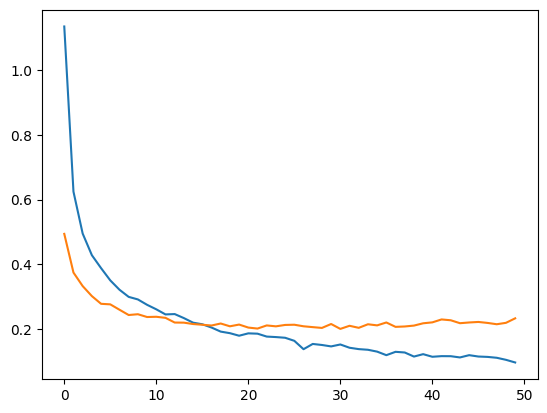

In [23]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [63]:
n=0 
x = np.expand_dims(x_test[n],axis=0)# просто двумерную матрицу подать нельзя, он хочет на вход 3-х мерный тензор.
res = model.predict(x)
print(res)
print(f'Распознаная цифра: {np.argmax(res)}')

1/1 [==============================] - 0s 36ms/step
[[1.3878229e-08 2.2908964e-09 4.6831437e-06 2.7035261e-04 8.8392774e-12
  2.1656916e-08 1.3635799e-13 9.9972409e-01 2.9707903e-07 5.3852472e-07]]
Распознаная цифра: 7


In [69]:
pred = model.predict(x_test)
pred

313/313 [==============================] - 1s 2ms/step


array([[1.3878203e-08, 2.2908964e-09, 4.6831346e-06, ..., 9.9972409e-01,
        2.9707903e-07, 5.3852375e-07],
       [4.1921350e-08, 1.3342019e-05, 9.9998283e-01, ..., 4.5546036e-14,
        2.2109207e-08, 5.4899439e-13],
       [7.5941184e-06, 9.9823439e-01, 1.1891379e-03, ..., 3.0929237e-04,
        1.4830744e-04, 1.1684250e-06],
       ...,
       [1.5014066e-13, 5.9385920e-11, 3.0424580e-08, ..., 2.8100112e-06,
        3.8533735e-06, 5.9592699e-06],
       [9.9424198e-11, 1.3274789e-11, 2.9654580e-13, ..., 6.5919249e-11,
        5.7145513e-05, 5.4016036e-10],
       [1.4641060e-07, 1.1287653e-09, 2.3930317e-08, ..., 3.5045935e-12,
        1.2733110e-10, 1.1772328e-08]], dtype=float32)

In [70]:
pred = np.argmax(pred,axis=1)

In [78]:
mask = pred==y_test

In [84]:
x_false = x_test[~mask]

In [83]:
pred_false = pred[~mask]

Значение сети: 7


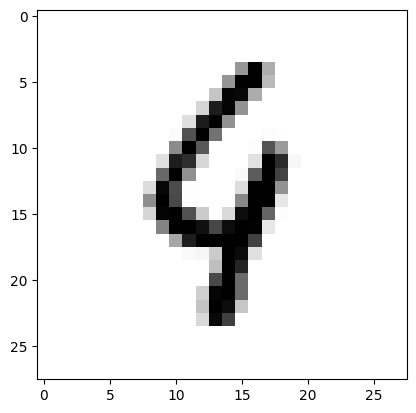

Значение сети: 2


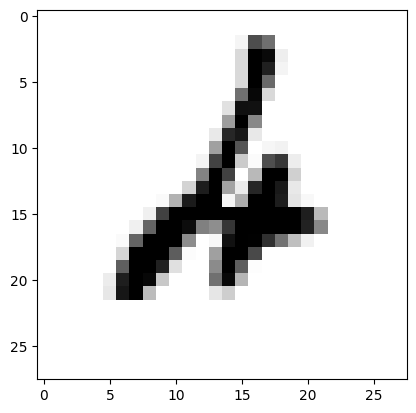

Значение сети: 1


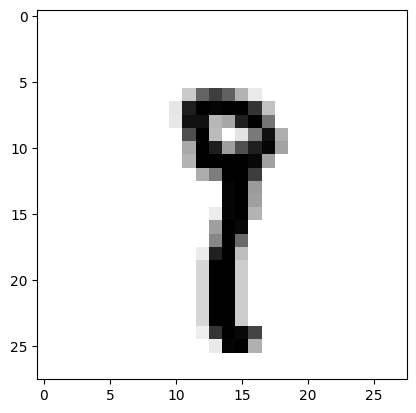

Значение сети: 0


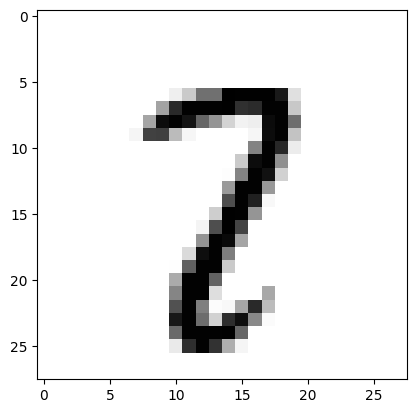

Значение сети: 4


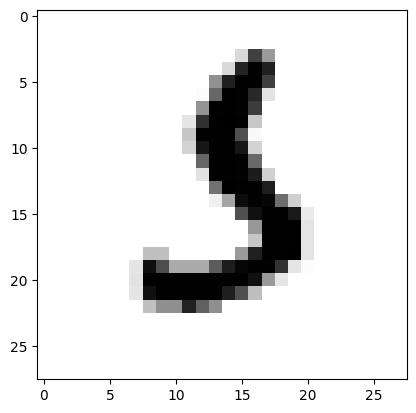

Значение сети: 1


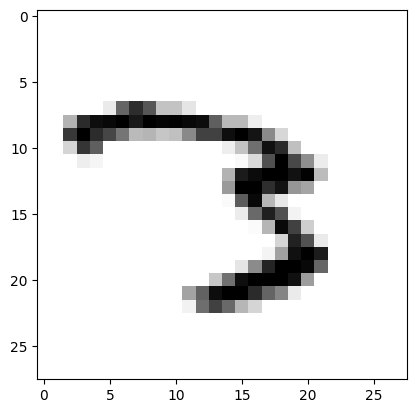

Значение сети: 4


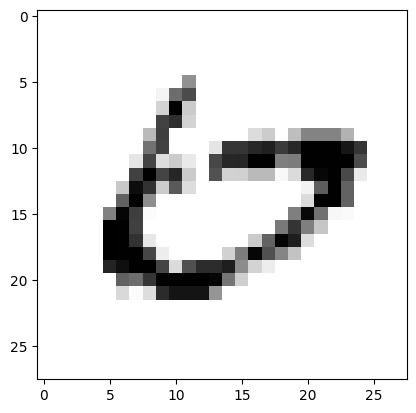

Значение сети: 9


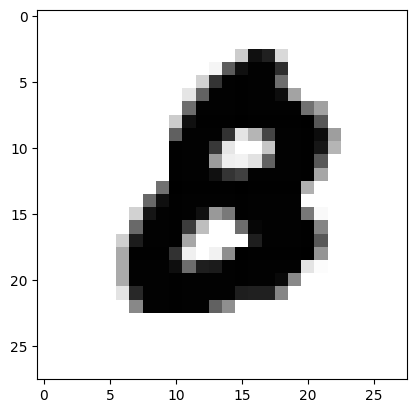

Значение сети: 5


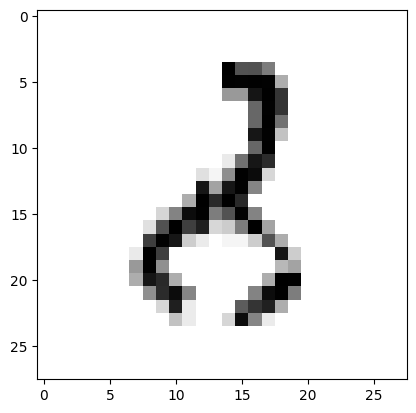

Значение сети: 9


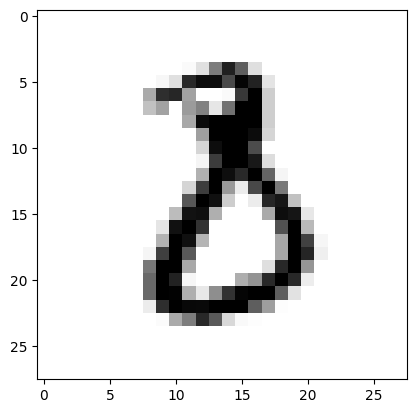

In [90]:
for i in range(10):
    print("Значение сети: " +str(y_test[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

In [93]:
len(x_train)

60000

array([9639, 7971, 8402, 4687, 2138, 7199, 9005, 3385, 3577,  855,  139,
        718, 7202, 5414, 7982, 4605, 8760, 4656, 2260, 5963,  863, 7292,
       2735, 4956, 4450, 6206, 4667, 1812, 2427, 4309, 2769, 1533, 1849,
        712,  598, 7030, 4499, 1537, 7554, 9430,  340,  446, 1510, 7959,
       7182, 1638, 5245, 7827, 1101, 5183, 4393, 4758, 3286,  194, 1912,
       3476, 2519, 1070, 9989, 6098, 2470, 2607, 1939, 8267, 4253, 5390,
       8288, 3083, 2016, 8522, 3691, 5797, 2279, 3625, 7712, 1190, 8678,
       7071, 6429, 2189, 8444, 5397, 2714, 8621, 3530, 2266,  151, 6325,
       7909, 3670, 9179, 4967, 6766, 8810, 7928, 8470, 2570,  166, 1109,
       2221, 8826,  540, 4899, 1164, 1293, 2991, 1511, 2019, 9905, 8507,
       7717, 7529, 7061,  873, 5804, 2203, 1679, 4111, 5659, 1364, 7220,
       2511, 4975, 6806, 5665, 2412, 1697, 4630, 1046, 1369, 4581, 7531,
       4654, 4917, 9977, 2732, 6889, 3645, 9380, 9741, 9744, 7784, 7465,
       5322, 6647, 8287, 7969, 5831, 8854, 8346, 53